In [1]:
#Required for accessing openml datasets from Lale
!pip install 'liac-arff>=2.4.0'

### Dataset with class imbalance

In [2]:
import lale.datasets.openml
import pandas as pd
(train_X, train_y), (test_X, test_y) = lale.datasets.openml.fetch(
    'breast-cancer', 'classification', preprocess=True)

In [3]:
import numpy as np
np.bincount(train_y)

array([140,  51])

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem as Nys
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble.forest import RandomForestClassifier
from xgboost import XGBClassifier
from lale.lib.lale import Hyperopt
from lale.lib.imblearn import SMOTE, CondensedNearestNeighbour, SMOTEENN
from sklearn.metrics import accuracy_score
import lale
lale.wrap_imported_operators()

### A pipeline without any imbalance correction

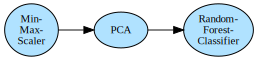

In [5]:
pipeline_without_correction =  MinMaxScaler() >> PCA() >> RandomForestClassifier()
pipeline_without_correction.visualize()

In [6]:
optimizer = Hyperopt(estimator=pipeline_without_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:18<00:00,  1.87s/trial, best loss: -0.6762012987012987]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.656916,0.345312,0.564813,ok
p2,2,-0.661981,0.310127,0.564000,ok
p3,3,-0.596851,0.270330,0.593561,ok
p4,4,-0.563214,0.326445,0.576271,ok
p5,5,NaN,NaN,NaN,fail
p6,6,NaN,NaN,NaN,fail
p7,7,-0.676201,0.320895,0.540427,ok
p8,8,-0.608766,0.286823,1.457592,ok


0.6736842105263158


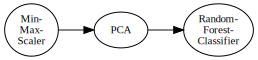

In [7]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Over-sampling from imbalanced-learn

In [8]:
pipeline_with_correction =  SMOTE(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:23<00:00,  2.34s/trial, best loss: -0.688474025974026]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.618929,0.492785,0.666202,ok
p2,2,-0.682532,0.411787,0.650347,ok
p3,3,-0.553799,0.355203,0.624051,ok
p4,4,-0.578474,0.463736,0.657638,ok
p5,5,NaN,NaN,NaN,fail
p6,6,-0.683344,0.424861,0.635147,ok
p7,7,-0.688474,0.339153,0.622279,ok
p8,8,-0.615779,0.381149,2.912302,ok


0.7157894736842105


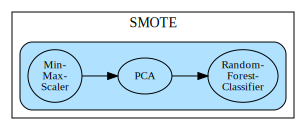

In [9]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Under-sampling from imbalanced-learn

In [10]:
pipeline_with_correction =  CondensedNearestNeighbour(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:30<00:00,  3.04s/trial, best loss: -0.6671103896103896]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.631981,0.599472,0.633855,ok
p2,2,-0.611331,0.875144,0.640856,ok
p3,3,-0.599773,0.640310,0.655535,ok
p4,4,-0.584903,0.565986,0.646350,ok
p5,5,NaN,NaN,NaN,fail
p6,6,NaN,NaN,NaN,fail
p7,7,-0.667110,0.539357,0.603590,ok
p8,8,-0.592825,0.700902,0.723557,ok


0.7263157894736842


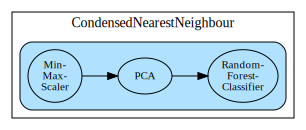

In [11]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Combined over and under sampling from imbalanced-learn

In [12]:
pipeline_with_correction =  SMOTEENN(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:17<00:00,  1.79s/trial, best loss: -0.6409415584415585]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.597955,0.456288,0.950341,ok
p2,2,-0.640942,0.355614,0.949534,ok
p3,3,-0.578214,0.317601,0.780081,ok
p4,4,-0.552370,0.392388,0.974286,ok
p5,5,NaN,NaN,NaN,fail
p6,6,NaN,NaN,NaN,fail
p7,7,-0.621818,0.365201,1.044673,ok
p8,8,-0.584838,0.349730,5.378953,ok


0.5473684210526316


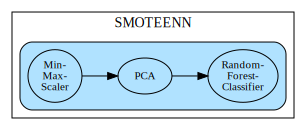

In [13]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()